In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from datetime import timedelta
import seaborn as sns


In [2]:
noreuse = pd.read_csv('outputs/noreuse.stage3-compile-profile.csv',
  names=["File", "Condition", "Metric", "Value"])
reuse = pd.read_csv('outputs/reuse.stage3-compile-profile.csv', 
                      names=["File", "Condition", "Metric", "Value"])
print("noreuse"); display(noreuse);
print("reuse"); display(reuse);

noreuse


,File,Condition,Metric,Value
0,Init/Prelude.lean,reuse_across_ctor_disabled,rss,147664896
1,Init/Prelude.lean,reuse_across_ctor_disabled,num_alloc,1321689
2,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_alloc,26538111
3,Init/Prelude.lean,reuse_across_ctor_disabled,num_dealloc,1273439
4,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_dealloc,26156875
...,...,...,...,...
9345,Lake/Main.lean,reuse_across_ctor_disabled,num_pages,3715
9346,Lake/Main.lean,reuse_across_ctor_disabled,num_exports,0
9347,Lake/Main.lean,reuse_across_ctor_disabled,num_recycled_pages,743
9348,Lake/Main.lean,reuse_across_ctor_disabled,c_file_size,2894


reuse


,File,Condition,Metric,Value
0,Init/Prelude.lean,reuse_across_ctor_disabled,rss,147271680
1,Init/Prelude.lean,reuse_across_ctor_disabled,num_alloc,1321689
2,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_alloc,26538111
3,Init/Prelude.lean,reuse_across_ctor_disabled,num_dealloc,1273439
4,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_dealloc,26156875
...,...,...,...,...
9345,Lake/Main.lean,reuse_across_ctor_disabled,num_pages,3715
9346,Lake/Main.lean,reuse_across_ctor_disabled,num_exports,0
9347,Lake/Main.lean,reuse_across_ctor_disabled,num_recycled_pages,743
9348,Lake/Main.lean,reuse_across_ctor_disabled,c_file_size,2894


In [3]:
# Filtering the rows where Metric is 'time_elapsed_ms' and then summing the 'Value' column for both DataFrames
sum_time_elapsed_reuse = reuse[reuse["Metric"] == "time_elapsed_ms"]["Value"].sum()
sum_time_elapsed_no_reuse = noreuse[noreuse["Metric"] == "time_elapsed_ms"]["Value"].sum()

sum_time_elapsed_reuse, sum_time_elapsed_no_reuse

# Ensuring the values are in a compatible format for timedelta
time_reuse = timedelta(milliseconds=int(sum_time_elapsed_reuse))
time_no_reuse = timedelta(milliseconds=int(sum_time_elapsed_no_reuse))

# Formatting as hours:minutes:seconds.milliseconds again
time_format_reuse = str(time_reuse)
time_format_no_reuse = str(time_no_reuse)
display(HTML(f"<h3>time (reuse): {time_format_reuse} | time (noreuse): {time_format_no_reuse}</h3>"))

In [4]:
df_merged = pd.merge(reuse, noreuse, on=["File", "Metric"], suffixes=('_reuse', '_no_reuse'))
display(df_merged)

,File,Condition_reuse,Metric,Value_reuse,Condition_no_reuse,Value_no_reuse
0,Init/Prelude.lean,reuse_across_ctor_disabled,rss,147271680,reuse_across_ctor_disabled,147664896
1,Init/Prelude.lean,reuse_across_ctor_disabled,num_alloc,1321689,reuse_across_ctor_disabled,1321689
2,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_alloc,26538111,reuse_across_ctor_disabled,26538111
3,Init/Prelude.lean,reuse_across_ctor_disabled,num_dealloc,1273439,reuse_across_ctor_disabled,1273439
4,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_dealloc,26156875,reuse_across_ctor_disabled,26156875
...,...,...,...,...,...,...
9345,Lake/Main.lean,reuse_across_ctor_disabled,num_pages,3715,reuse_across_ctor_disabled,3715
9346,Lake/Main.lean,reuse_across_ctor_disabled,num_exports,0,reuse_across_ctor_disabled,0
9347,Lake/Main.lean,reuse_across_ctor_disabled,num_recycled_pages,743,reuse_across_ctor_disabled,743
9348,Lake/Main.lean,reuse_across_ctor_disabled,c_file_size,2894,reuse_across_ctor_disabled,2894


,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Lean/Elab/Deriving.lean,435,783,348,44.444444
1,Lake/Build.lean,271,387,116,29.974160
2,Lean/Data/PersistentHashSet.lean,192,267,75,28.089888
3,Init/Data/BitVec/Folds.lean,245,327,82,25.076453
4,Lake/Config/Script.lean,284,374,90,24.064171
...,...,...,...,...,...
845,Lean/Compiler/LCNF/LCtx.lean,506,403,-103,-25.558313
846,Lean/Linter/Util.lean,408,324,-84,-25.925926
847,Lean/Server/FileWorker/SetupFile.lean,674,521,-153,-29.366603
848,Lean/Elab.lean,1343,1028,-315,-30.642023


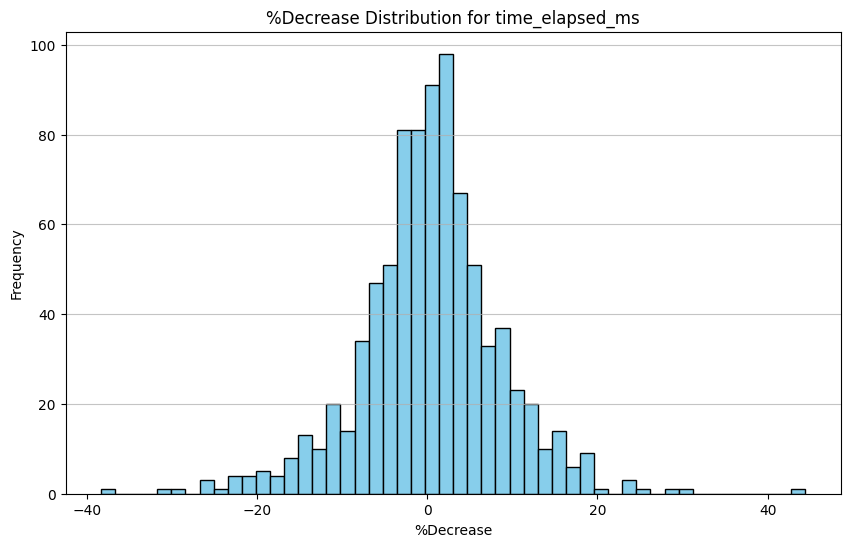

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Init/Data/FloatArray.lean,88354816,89530368,1175552,1.313020
1,Lean/Util/ShareCommon.lean,111194112,112635904,1441792,1.280047
2,Init/Data/Format.lean,93941760,95117312,1175552,1.235897
3,Init/Data/ToString/Macro.lean,102694912,103878656,1183744,1.139545
4,Lake/Util/Exit.lean,136077312,137523200,1445888,1.051378
...,...,...,...,...,...
845,Init/Data/Int/Bitwise.lean,90066944,89407488,-659456,-0.737585
846,Lean/Compiler/IR/LLVMBindings.lean,123523072,122605568,-917504,-0.748338
847,Lake/Build/Executable.lean,261505024,259534848,-1970176,-0.759118
848,Init/Coe.lean,76546048,75890688,-655360,-0.863558


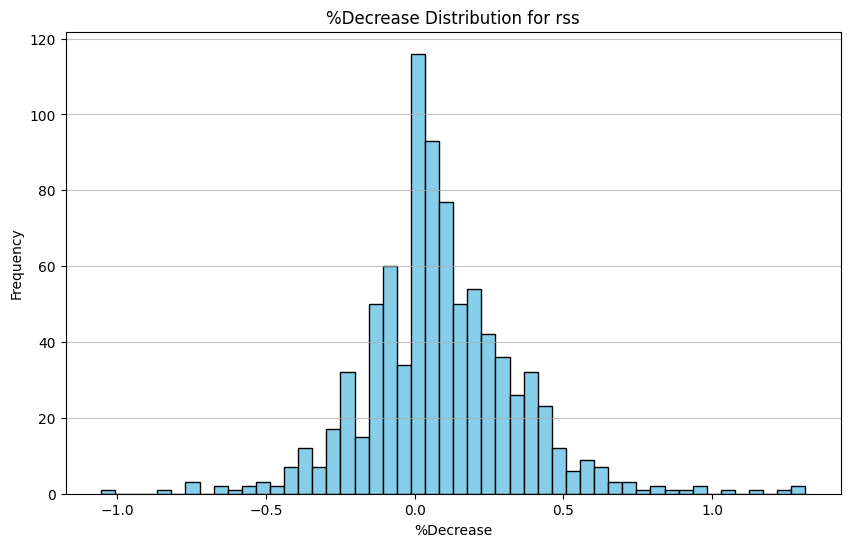

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Init/Data/List/Lemmas.lean,32689190,32690013,823,0.002518
1,Lean/Widget/TaggedText.lean,7325921,7326001,80,0.001092
2,Init/Data/Nat/Mod.lean,3043080,3043105,25,0.000822
3,Lean/Meta/Match/Value.lean,2443854,2443872,18,0.000737
4,Lean/Elab/Tactic/Generalize.lean,3704788,3704801,13,0.000351
...,...,...,...,...,...
845,Init/Data/Nat/Bitwise/Lemmas.lean,19818697,19818636,-61,-0.000308
846,Init/Data/BitVec/Lemmas.lean,67572727,67572426,-301,-0.000445
847,Init/Control/Lawful/Instances.lean,17478042,17477919,-123,-0.000704
848,Lean/Data/Json/Elab.lean,7840267,7840211,-56,-0.000714


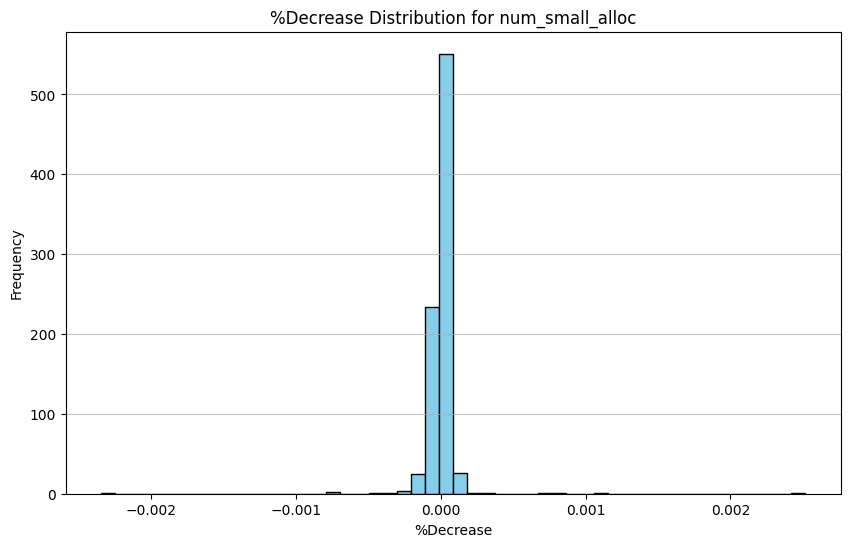

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Init/Prelude.lean,1273439,1273439,0,0.0
1,Lean/Meta/Tactic/Rfl.lean,330100,330100,0,0.0
2,Lean/Elab/Deriving/Util.lean,679686,679686,0,0.0
3,Lean/Elab/Quotation/Precheck.lean,598559,598559,0,0.0
4,Lean/Meta/Tactic/Acyclic.lean,168982,168982,0,0.0
...,...,...,...,...,...
845,Lean/DeclarationRange.lean,146874,146874,0,0.0
846,Lean/Parser/StrInterpolation.lean,64484,64484,0,0.0
847,Lean/Data/Lsp/Utf16.lean,77154,77154,0,0.0
848,Lean/CoreM.lean,836003,836003,0,0.0


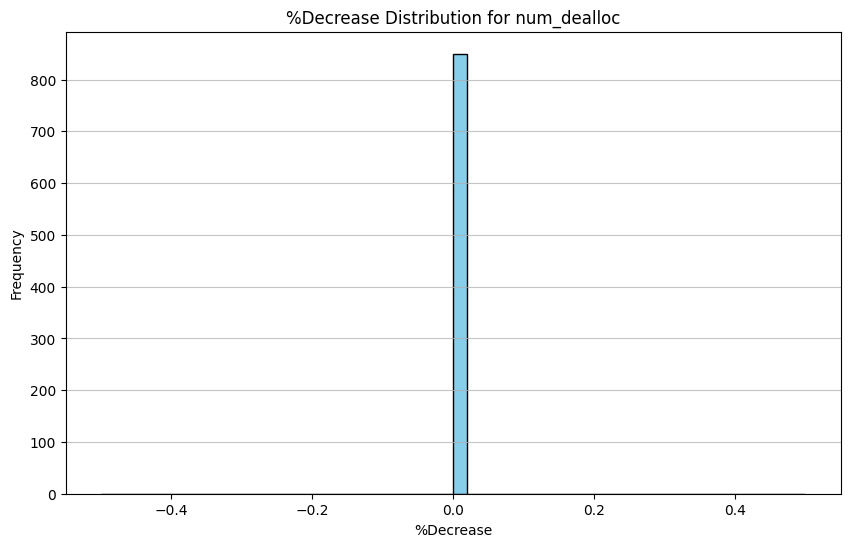

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Init/Data/List/Lemmas.lean,32276559,32277379,820,0.002540
1,Lean/Widget/TaggedText.lean,6941753,6941833,80,0.001152
2,Init/Data/Nat/Mod.lean,2715489,2715514,25,0.000921
3,Lean/Meta/Match/Value.lean,2010213,2010231,18,0.000895
4,Lean/Elab/Tactic/Generalize.lean,3122811,3122824,13,0.000416
...,...,...,...,...,...
845,Init/Data/Nat/Bitwise/Lemmas.lean,19441394,19441333,-61,-0.000314
846,Init/Data/BitVec/Lemmas.lean,67092646,67092345,-301,-0.000449
847,Init/Control/Lawful/Instances.lean,17127693,17127570,-123,-0.000718
848,Lean/Data/Json/Elab.lean,7477049,7476993,-56,-0.000749


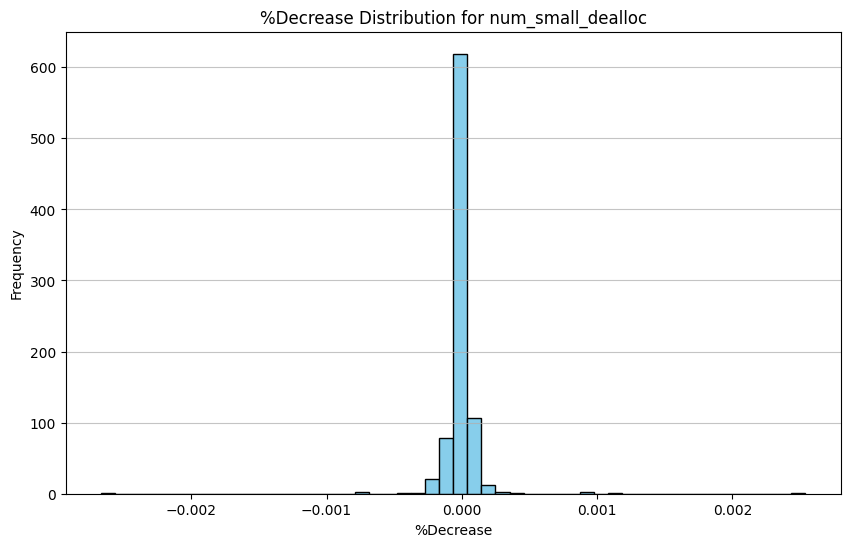

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Init/Prelude.lean,353579,353579,0,0.0
1,Lean/Meta/Tactic/Rfl.lean,214935,214935,0,0.0
2,Lean/Elab/Deriving/Util.lean,174727,174727,0,0.0
3,Lean/Elab/Quotation/Precheck.lean,261895,261895,0,0.0
4,Lean/Meta/Tactic/Acyclic.lean,63287,63287,0,0.0
...,...,...,...,...,...
845,Lean/DeclarationRange.lean,83728,83728,0,0.0
846,Lean/Parser/StrInterpolation.lean,16919,16919,0,0.0
847,Lean/Data/Lsp/Utf16.lean,18541,18541,0,0.0
848,Lean/CoreM.lean,494608,494608,0,0.0


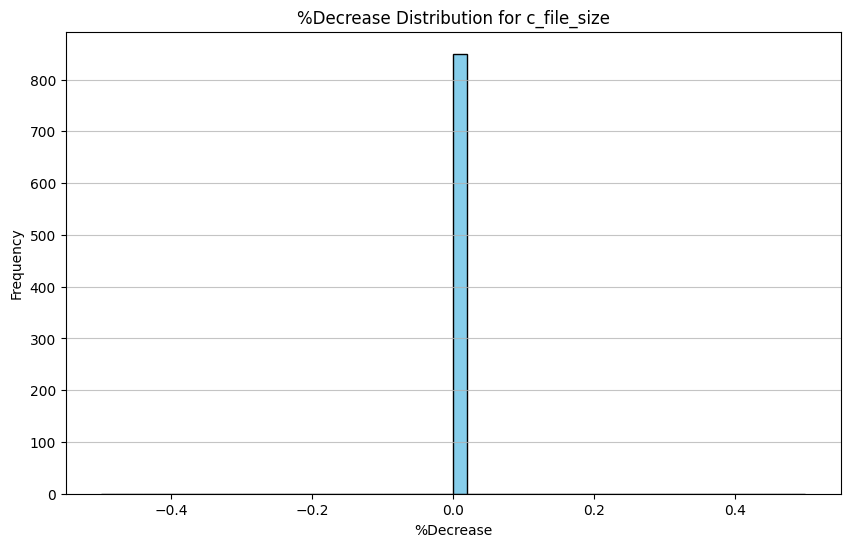

In [7]:
# metrics for which we should compute decreases
df_corr = pd.DataFrame(df_merged["File"].unique(), columns=["File"]) 

for metric in ["time_elapsed_ms", "rss", "num_small_alloc", "num_dealloc", "num_small_dealloc", "c_file_size"]:
  display(HTML(f"<h1>{metric}</h1>"))
  df_metric = df_merged[df_merged["Metric"] == metric].copy()
  df_metric["absolute_diff"] = df_merged["Value_no_reuse"] - df_merged["Value_reuse"]
  df_metric["%Decrease"] = (
    100.0 * (df_merged["Value_no_reuse"] - df_merged["Value_reuse"]) / df_merged["Value_no_reuse"]
  )
  df_metric = df_metric.drop(["Condition_reuse", "Condition_no_reuse", "Metric"], axis=1)

  df_kv = df_metric[["File", "%Decrease"]].copy()
  df_kv.rename(columns={"%Decrease": metric}, inplace=True)
  # df_corr = pd.merge(df_corr, df_kv, on="File", how="outer")
  
  # Sorting by maximum decrease
  df_metric_sorted = df_metric.sort_values(by="%Decrease", ascending=False)
  df_metric_sorted.reset_index(drop=True, inplace=True) # changes index to start from zero.
  display(df_metric_sorted)
  plt.figure(figsize=(10, 6))
  plt.hist(df_metric_sorted['%Decrease'], bins=50, color='skyblue', edgecolor='black')
  plt.title(f'%Decrease Distribution for {metric}')
  plt.xlabel('%Decrease')
  plt.ylabel('Frequency')
  plt.grid(axis='y', alpha=0.75)
  plt.show()

# corr = df_corr.drop('File', axis=1).corr()  # Assuming df_corr is defined and populated
# plt.figure(figsize=(12,8))
# sns.heatmap(corr, cmap="Greens",annot=True)


,time_elapsed_ms,num_alloc
File,,
Lean/Elab/Tactic/Omega/Frontend.lean,16783,4034116
Lean/Elab/Do.lean,14878,6328540
Lean/PrettyPrinter/Delaborator/Builtins.lean,11492,5228121
Lean/Compiler/IR/EmitLLVM.lean,11071,3635984
Lean/Elab/Quotation.lean,9717,3926757
...,...,...
Init/Control/Id.lean,113,63540
Init/Data/ToString.lean,111,57081
Init/Data/Option/BasicAux.lean,111,59053


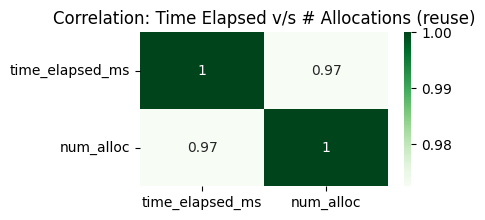

,time_elapsed_ms,num_alloc
File,,
Lean/Elab/Tactic/Omega/Frontend.lean,16052,4034116
Lean/Elab/Do.lean,14604,6328540
Lean/PrettyPrinter/Delaborator/Builtins.lean,11777,5228121
Lean/Compiler/IR/EmitLLVM.lean,11086,3635984
Lean/Elab/App.lean,9727,4005911
...,...,...
Lean/LoadDynlib.lean,122,62501
Init/Data/ByteArray.lean,119,55552
Init/Data/String.lean,117,55644


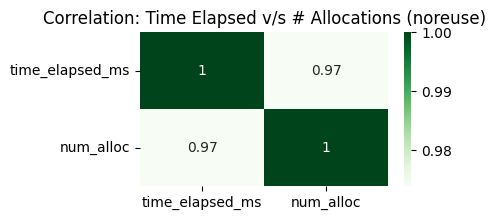

,time_elapsed_ms,num_alloc
File,,
Lean/Elab/Tactic/Omega/Frontend.lean,16783,4034116
Lean/Elab/Tactic/Omega/Frontend.lean,16052,4034116
Lean/Elab/Do.lean,14878,6328540
Lean/Elab/Do.lean,14604,6328540
Lean/PrettyPrinter/Delaborator/Builtins.lean,11777,5228121
...,...,...
Init/Data/ToString.lean,111,57081
Init/Data/Char.lean,104,53141
Init/Data/Cast.lean,103,48545


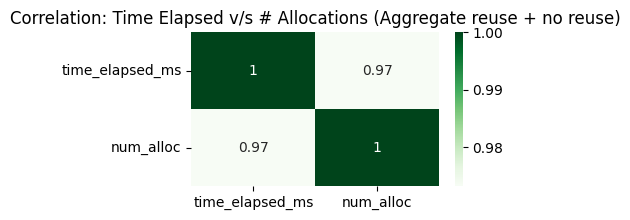

In [8]:
df_full = None

# for each file, grab num alloc and time elapsed.
variant2df = { "reuse" : reuse, "noreuse": noreuse }
for (variant, df) in variant2df.items():
    metric2df = {}
    for metric in ["time_elapsed_ms", "num_alloc"]:
      out = df[df["Metric"] == metric].copy()
      out = out[["File", "Value"]]
      out.rename(columns={"Value" : metric}, inplace=True)
      out = out[["File", metric]].set_index("File")
      metric2df[metric] = out
    
    df_metrics_merged = metric2df["time_elapsed_ms"].join(metric2df["num_alloc"])
    df_metrics_merged = df_metrics_merged.sort_values(by='time_elapsed_ms', ascending=False)

    display(HTML(f"<h3>Correlation: Time elapsed v/s # allocations ({variant})</h3>"))
    display(df_metrics_merged)
    corr = df_metrics_merged.corr()  # Assuming df_corr is defined and populated
    plt.figure(figsize=(4,2))
    sns.heatmap(corr, cmap="Greens",annot=True)
    plt.title(f"Correlation: Time Elapsed v/s # Allocations ({variant})")
    plt.show()

    
    if df_full is None:
        df_full = df_metrics_merged
    else:
        df_full = pd.concat([df_full, df_metrics_merged])

df_full = df_full.sort_values(by='time_elapsed_ms', ascending=False)
display(df_full)
corr = df_full.corr() 
plt.figure(figsize=(4,2))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.title('Correlation: Time Elapsed v/s # Allocations (Aggregate reuse + no reuse)')
plt.show()


In [ ]:
def print_file_info(name):
    for reuses in ["reuse", "no_reuse"]: